선형회귀 (linear regression): 로지스틱 회귀, 신경망 알고리즘은 선형 회귀를 기반으로 구현
- 신경망 알고리즘 ==> 딥러닝
- 직선의 방정식이 가장 적합

In [31]:
# from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor # 회귀-예측
from sklearn.model_selection import train_test_split 
                                    # train_test_split : train data, test data를 나누는 함수
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호(-) 표기

In [32]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
    )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
    )

In [33]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42   
)

In [34]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [35]:
# knn 
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)


KNeighborsRegressor(n_neighbors=3)

In [36]:
df= pd.DataFrame([perch_length, perch_weight])
df = df.T
df

,0,1
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0
5,18.0,100.0
6,18.7,78.0
7,19.0,80.0
8,19.6,85.0
9,20.0,85.0


In [37]:
# 데이터 예측하기
# 길이가 50cm인 농어 예측
knr.predict([[50]]) # 1033.33

array([1033.33333333])

In [40]:
distance, indexs = knr.kneighbors([[50]])
indexs

array([[34,  8, 14]], dtype=int64)

In [42]:
distance, indexs = knr.kneighbors([[30]])
indexs

array([[28, 13, 18]], dtype=int64)

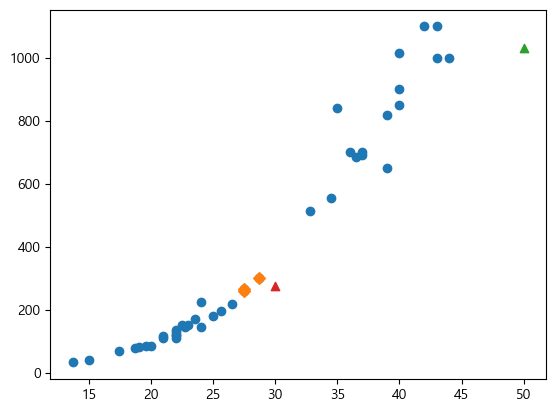

In [43]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexs], train_target[indexs], marker='D')
plt.scatter(50,1033, marker='^')
plt.scatter(30,275, marker='^')


In [ ]:
knr.predict([[70]]) # 1033.33

array([1033.33333333])

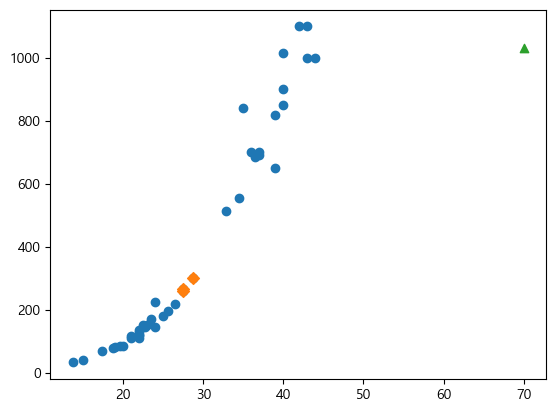

In [44]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexs], train_target[indexs], marker='D')
plt.scatter(70,1033, marker='^')

In [ ]:
# knn 회귀의 단점은 훈련세트가 없는 것은 데이터 예측 제대로 안됨.
knr.predict([[100]]) # 1033.33

array([1033.33333333])

In [ ]:
# 길이가 길어지면 무게 일정 ==> 그래프 그려보자

선형회귀

In [46]:
from sklearn.linear_model import LinearRegression


In [49]:
# 훈련
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [53]:
# 농어 50cm, 무게 15000g 
# knn의 경우 1033g , lr의 경우: 1241g
# 선형 회귀 : 선을 그려서 예측을 한다. 
lr.predict([[50]])

array([1241.83860323])

In [55]:
# 선을 그리려면 기울기(a)와 y절편(b)이 있어야 직선방정식을 구할 수 있음. y=ax+b
# lr의 경우, 훈련을 하면 기울기와 y절편이 만들어져.
# lr.coef_ : 기울기
# lr.intercept_ : y절편
# _ : 모델을 훈련시켜서 모델에서 제공하는 변수는 _ 사용 
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


In [56]:
df[0]

0      8.4
1     13.7
2     15.0
3     16.2
4     17.4
5     18.0
6     18.7
7     19.0
8     19.6
9     20.0
10    21.0
11    21.0
12    21.0
13    21.3
14    22.0
15    22.0
16    22.0
17    22.0
18    22.0
19    22.5
20    22.5
21    22.7
22    23.0
23    23.5
24    24.0
25    24.0
26    24.6
27    25.0
28    25.6
29    26.5
30    27.3
31    27.5
32    27.5
33    27.5
34    28.0
35    28.7
36    30.0
37    32.8
38    34.5
39    35.0
40    36.5
41    36.0
42    37.0
43    37.0
44    39.0
45    39.0
46    39.0
47    40.0
48    40.0
49    40.0
50    40.0
51    42.0
52    43.0
53    43.0
54    43.5
55    44.0
Name: 0, dtype: float64

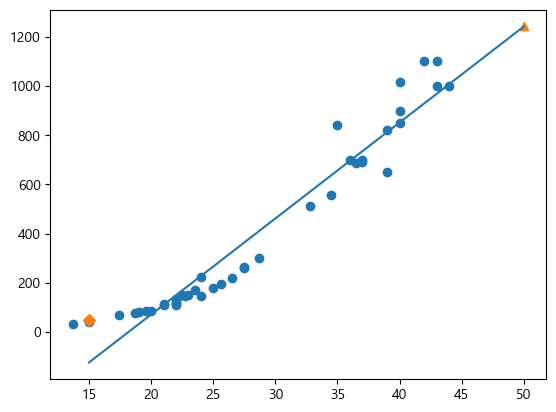

In [59]:
# 그래프
plt.scatter(train_input,train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.plot(15,50, marker='D')
plt.scatter(50, 1241.8, marker='^')
# ==> 15를 넣으면 -값이 나와 ==> 2차원 방정식으로 변환 ax^2+bx+c